Dataset= News Headlines Dataset For Sarcasm Detection

In [118]:
import json
import pandas as pd
import numpy as np
import tensorflow as tf

#### Ways to load the json DataSet

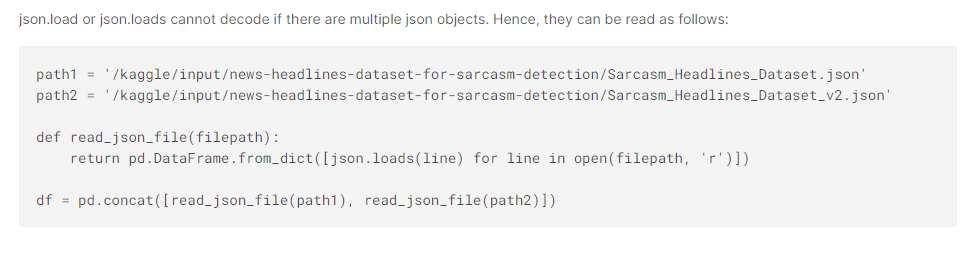

In [7]:
path1 = 'Sarcasm_Headlines_Dataset.json'
path2 = 'Sarcasm_Headlines_Dataset_v2.json'

def read_json_file(filepath):
    return pd.DataFrame.from_dict([json.loads(line) for line in open(filepath, 'r')])

df = pd.concat([read_json_file(path1), read_json_file(path2)])

In [28]:
Dataset1=pd.read_json('Sarcasm_Headlines_Dataset_v2.json',lines=True)
Dataset2=pd.read_json('Sarcasm_Headlines_Dataset.json',lines=True)
Data=pd.concat([Dataset1,Dataset2], axis=0, join='outer')

**Failed Syntax**<br>
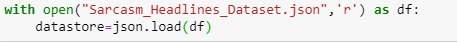


In [70]:
Dataset1

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


## Tokenizing the sentences

In [74]:
data=Dataset1

In [75]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [76]:
tokenizer=Tokenizer(oov_token="<oov>")
tokenizer.fit_on_texts(data["headline"])
words_index=tokenizer.word_index

In [77]:
print("length of the vocab: "+ str(len(words_index)))
print("some of the words:")
#[words_index[keys] for keys in words_index.keys()] ### didn't work

length of the vocab: 30885
some of the words:


In [78]:
sentences=tokenizer.texts_to_sequences(data["headline"])

**Adding padding to the sentences to make them of similar lengths**

In [79]:
padded=pad_sequences(sentences,padding='post') #Padding["post"] added to the end

In [80]:
data

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [87]:
print("ACTUAL SENTENCE IN ENGLISH: "+ str(data["headline"][2]))
print("without padding: "+str(sentences[2]))
print("with padding: "+str(padded[2]))
print("shape of the matrix of the sentences: "+ str(padded.shape))

ACTUAL SENTENCE IN ENGLISH: eat your veggies: 9 deliciously different recipes
without padding: [863, 33, 11427, 262, 16005, 647, 1484]
with padding: [  863    33 11427   262 16005   647  1484     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0

## Word Embedding on IMDB dataset

The Datasets that can be direcctly downloaded from tensorflow_datasets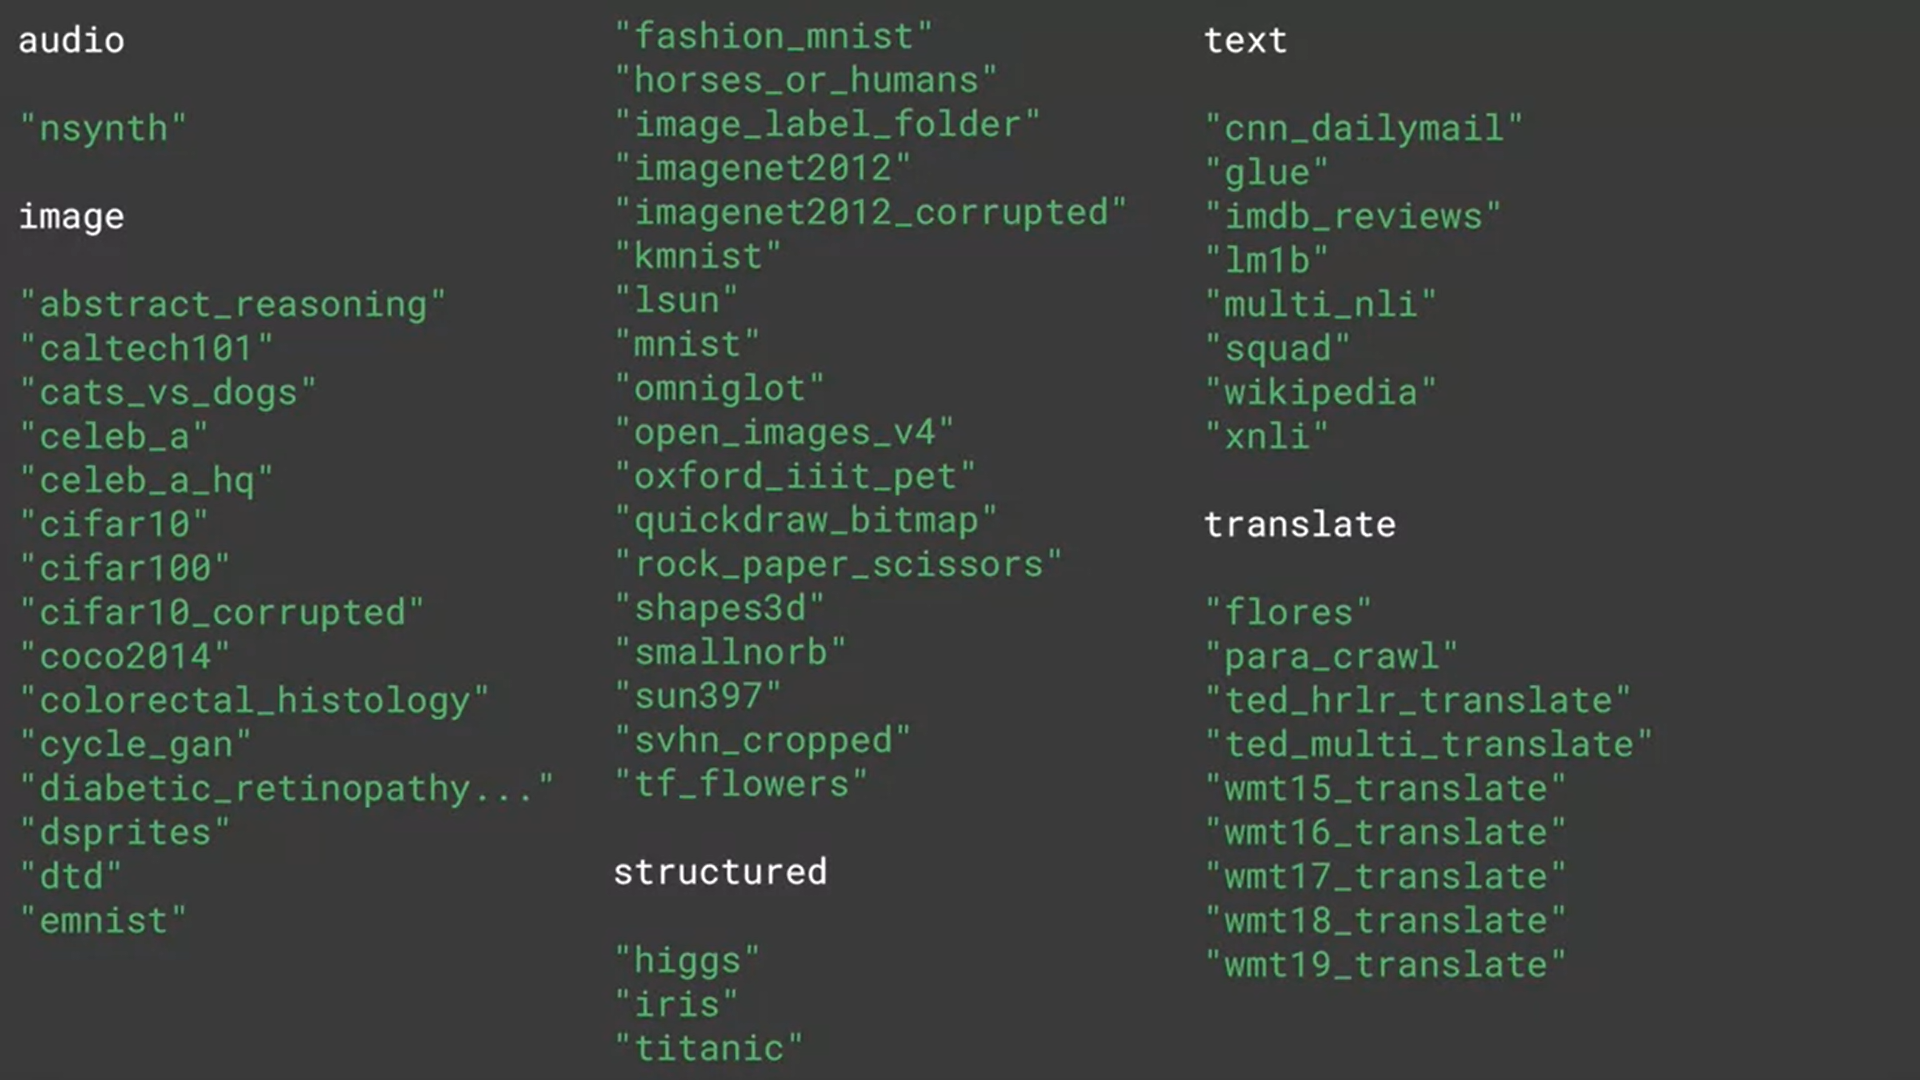

**How Embedding Works**<br>how embeddings work for representing the semantics of a word. So now instead of the word just being a number, it's like a vector in n-dimensional space. We're using 16 and 32 dimensions in different examples. So for example the word dog, might be a vector pointing in a particular direction and then the word K9, could be learned as a vector pointing in a very similar direction, and we know they have very similar semantic meaning off of that. All of this is actually done for us in embeddings.

You have words in a sentence and often words that have similar meanings are close to each other. So in a movie review, it might say that the movie was dull and boring, or it might say that it was fun and exciting. So what if you could pick a vector in a higher-dimensional space say 16 dimensions, and words that are found together are given similar vectors. Then over time, words can begin to cluster together. The meaning of the words can come from the labeling of the dataset. So in this case, we say a negative review and the words dull and boring show up a lot in the negative review so that they have similar sentiments, and they are close to each other in the sentence. Thus their vectors will be similar. As the neural network trains, it can then learn these vectors associating them with the labels to come up with what's called an embedding i.e., the vectors for each word with their associated sentiment. The results of the embedding will be a 2D array with the length of the sentence and the embedding dimension for example 16 as its size

In [88]:
import tensorflow_datasets as tfds
imdb,info=tfds.load("imdb_reviews",with_info=True,as_supervised=True)

Shuffling and writing examples to C:\Users\ranad\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteZ63TBD\imdb_reviews-train.tfrecord


Shuffling and writing examples to C:\Users\ranad\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteZ63TBD\imdb_reviews-test.tfrecord


Shuffling and writing examples to C:\Users\ranad\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteZ63TBD\imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to C:\Users\ranad\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [94]:
training_sentences=[]
training_labels=[]
testing_sentences=[]
testing_labels=[]

In [107]:
train_data, test_data = imdb['train'], imdb['test']

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [115]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [127]:
padded[3]

array([   0,    0,    0,    0,    0,   16,   70,   12,    7,    4,   63,
         13,  515,   17,   47,  161,  636, 2783,    1,    1,   52,   27,
          7, 9459,   17,    4,    1,    3,   52,   27,    7, 1261,    9,
        968,    1,    2,  437,    7,   13,   52,   23,   26,   75,  147,
         12,   18,   16,   33,  532,   23,   78,   65,    2,  170, 5341,
        161, 1181,  172,    3,  172,    3,  172,   10,    7,    6,  726,
         10,    7,   51,  222,   15,    4,  246,   63,  119,   23,   68,
        138,  243,    3,  214,  143,  207, 1010,  230,    8,    8,   11,
         38, 4012,    1,   15, 1262,   19,   13,    7,   22,  193,   58,
         52,   10,    7,    4,  210,   10,   45,    6,   26,   51, 9656,
          3,   47,  241,    5,  747,    6,   43,  309,    8,    8])

In [116]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])

? ? ? ? ? for me this is a story that starts with some funny jokes regarding <OOV> <OOV> when he is travelling with a <OOV> and when he is sitting in business <OOV> the problem is that when you have been watching this movie for an hour you will see the same fantasies funny situations again and again and again it is to predictable it is more done as a tv story where you can go away and come back without missing anything br br i like felix <OOV> as frank but that is not enough even when it is a comedy it has to have more variations and some kind of message to it's audience br br
For me this is a story that starts with some funny jokes regarding Franks fanatasies when he is travelling with a staircase and when he is sitting in business meetings... The problem is that when you have been watching this movie for an hour you will see the same fantasies/funny situations again and again and again. It is to predictable. It is more done as a TV story where you can go away and come back without mi

In [120]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [121]:
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3686 - accuracy: 0.8237 - val_loss: 0.3709 - val_accuracy: 0.8415
Epoch 2/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.0605 - accuracy: 0.9843 - val_loss: 0.5228 - val_accuracy: 0.8231
Epoch 3/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.0048 - accuracy: 0.9998 - val_loss: 0.6359 - val_accuracy: 0.8244
Epoch 4/10
1563/1563 [==============================] - 2s 2ms/step - loss: 8.6383e-04 - accuracy: 1.0000 - val_loss: 0.7188 - val_accuracy: 0.8244
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 2.5184e-04 - accuracy: 1.0000 - val_loss: 0.7944 - val_accuracy: 0.8253
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 9.2033e-05 - accuracy: 1.0000 - val_loss: 0.8619 - val_accuracy: 0.8246
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 3.5824e-05 - accuracy: 1.0000 - val_loss: 0.9303

In [123]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [124]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [125]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [126]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[11, 64, 102, 12, 7, 478, 1200]]
